# ***Motivación y Audiencia***

A partir de la preoupación nacida en los ***Estados Unidos*** debido a partir de la  cantidad de ***incidentes con armas de fuego***, potenciada esta por los tiroteos masivos en centros educativos y los enfrentamientos entre organizaciones delictivas, decidimos realizar un estudio de los datos disponibles en este dataset, entendiendo que nos dará la posibilidad de generar insights relevantes.

Entendemos que a partir de los datos disponibles, podremos ***entender mejor la relación entre distintos factores*** (variables), dándonos una mejor visión de cuales de estos son los mas influyentes. 

La ***audiencia objetivo*** de este proyecto incluye, sin ser excluyente, a ***altos mandos de las fuerzas del órden a nivel nacional y local*** que se pudieran beneficiar de los insights obtenidos mediante la interpretación de los datos. 

# ***Hipótesis y Preguntas***

A partir del dataset elegido, el cual aporta datos relacionados a eventos de violencia con armas de fuego, entendemos que debería existir la siguiente relación entre las variables:



*  ***Hipótesis Nº1:*** A mayor cantidad de armas involucradas en el evento, mayor cantidad de muertos. 
*   ***Hipótesis Nº2:*** A mayor cantidad de armas involucradas en el evento, mayor cantidad de heridos.
*   ***Hipótesis Nº3:*** La relación entre las variables puede determinar zonas y épocas en las que es mas frecuente o probable un incidente de este tipo.

***Preguntas previas:***

1.   ¿Existe una relación entre la cantidad de personas involucradas en un hecho, su sexo y su grupo etáreo con el resultado del mismo (participantes muertos o heridos)?

2.   ¿Hay alguna zona del territorio del país, o de algún estado en particular, que muestre mayor cantidad de incidentes?

3. ¿Existe algún tipo de relación entre la época del año y la cantidad de incidentes? 

4. Y de ser así, ¿Se da en una zona en particular o es uniforme en todo el territorio?


# ***Análisis Exploratorio de Datos (EDA)***



In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Proyecto DSCH/gun_violence'
gun_violence = pd.read_csv('gun_violence_data.csv')
gun_violence_map = pd.read_csv('gun_violence_data.csv')

Mounted at /content/gdrive
/content/gdrive/MyDrive/Proyecto DSCH/gun_violence


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 16.6 MB/s 
     |████████████████████████████████| 6.3 MB 52.3 MB/s 
     |████████████████████████████████| 16.7 MB 149 kB/s 


In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from google.colab import drive
import plotly.express as px

In [ ]:
gun_violence.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,92114,2014-01-01,Kentucky,Lexington,0,1,6.0,NaN,NaN,Shot - Wounded/Injured,38.0507,-84.4829,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,NaN,NaN
1,92117,2014-01-01,Kentucky,Cynthiana,0,1,4.0,0::Unknown,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,38.4333,-84.3542,1.0,1::22,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,78.0,27.0
2,92119,2014-01-01,Kentucky,Louisville,0,1,3.0,NaN,NaN,Shot - Wounded/Injured,38.2501,-85.8150,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,NaN,NaN
3,92125,2014-01-01,Oklahoma,Lawton,0,0,4.0,NaN,NaN,Shots Fired - No Injuries,34.6347,-98.4222,NaN,NaN,0::Adult 18+,0::Male||1::Male,0::Unharmed||1::Unharmed,0::Victim||1::Subject-Suspect,64.0,32.0
4,92131,2014-01-01,New York,Bronx,0,1,15.0,NaN,NaN,Pistol-whipping,40.8179,-73.8628,NaN,0::23,0::Adult 18+,0::Male,0::Injured,0::Victim,85.0,34.0


In [ ]:
gun_violence = gun_violence.drop(['incident_id', 'congressional_district', 'gun_stolen', 'participant_age',
                                  'participant_age_group',	'participant_gender', 'participant_status',	'participant_type','state_house_district'], axis=1)
gun_violence = gun_violence.drop(['gun_type', 'incident_characteristics'], axis=1)

In [ ]:
gun_violence.head()

,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,state_senate_district
0,2014-01-01,Kentucky,Lexington,0,1,38.0507,-84.4829,NaN,NaN
1,2014-01-01,Kentucky,Cynthiana,0,1,38.4333,-84.3542,1.0,27.0
2,2014-01-01,Kentucky,Louisville,0,1,38.2501,-85.8150,NaN,NaN
3,2014-01-01,Oklahoma,Lawton,0,0,34.6347,-98.4222,NaN,32.0
4,2014-01-01,New York,Bronx,0,1,40.8179,-73.8628,NaN,34.0


In [ ]:
gun_violence['state_n'] = pd.factorize(gun_violence['state'])[0] + 1
gun_violence['city_n'] = pd.factorize(gun_violence['city_or_county'])[0] + 1

In [ ]:
gun_violence.head()

,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,state_senate_district,state_n,city_n
0,2014-01-01,Kentucky,Lexington,0,1,38.0507,-84.4829,NaN,NaN,1,1
1,2014-01-01,Kentucky,Cynthiana,0,1,38.4333,-84.3542,1.0,27.0,1,2
2,2014-01-01,Kentucky,Louisville,0,1,38.2501,-85.8150,NaN,NaN,1,3
3,2014-01-01,Oklahoma,Lawton,0,0,34.6347,-98.4222,NaN,32.0,2,4
4,2014-01-01,New York,Bronx,0,1,40.8179,-73.8628,NaN,34.0,3,5


In [ ]:
pd.get_dummies(gun_violence, columns=["state"])

,date,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,state_senate_district,state_n,city_n,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,2014-01-01,Lexington,0,1,38.0507,-84.4829,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-01,Cynthiana,0,1,38.4333,-84.3542,1.0,27.0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,2014-01-01,Louisville,0,1,38.2501,-85.8150,NaN,NaN,1,3,...,0,0,0,0,0,0,0,0,0,0
3,2014-01-01,Lawton,0,0,34.6347,-98.4222,NaN,32.0,2,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-01-01,Bronx,0,1,40.8179,-73.8628,NaN,34.0,3,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184306,2018-03-30,Wadesville,0,0,38.0738,-87.8235,1.0,49.0,16,6008,...,0,0,0,0,0,0,0,0,0,0
184307,2018-03-25,Napakiak,0,0,60.6746,-161.7390,1.0,NaN,26,11854,...,0,0,0,0,0,0,0,0,0,0
184308,2018-03-30,Buffalo,0,1,42.9323,-78.8466,1.0,63.0,3,72,...,0,0,0,0,0,0,0,0,0,0
184309,2018-03-30,Centralia,0,1,38.5281,-89.1295,1.0,54.0,8,1404,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
gun_violence_2=gun_violence.dropna(subset=['state_senate_district', 'n_guns_involved'])

In [ ]:
gun_violence_2['date'] = pd.to_datetime(gun_violence_2['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
gun_violence_2['day'] = gun_violence_2['date'].dt.day
gun_violence_2['month'] = gun_violence_2['date'].dt.month
gun_violence_2['year'] = gun_violence_2['date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
gun_violence_2.head()

,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,state_senate_district,state_n,city_n,day,month,year
1,2014-01-01,Kentucky,Cynthiana,0,1,38.4333,-84.3542,1.0,27.0,1,2,1,1,2014
6,2014-01-01,New York,Brooklyn,1,0,40.6838,-73.9075,1.0,18.0,3,6,1,1,2014
12,2014-01-01,West Virginia,Charleston,0,1,38.3560,-81.6440,1.0,8.0,4,8,1,1,2014
110,2014-01-01,Alabama,Huntsville,0,2,34.6937,-86.6275,1.0,2.0,13,27,1,1,2014
126,2014-01-02,Florida,Merritt Island,0,1,28.3552,-80.6626,1.0,16.0,32,97,2,1,2014


In [ ]:
gun_violence_2 = gun_violence_2.drop(['date'], axis=1)

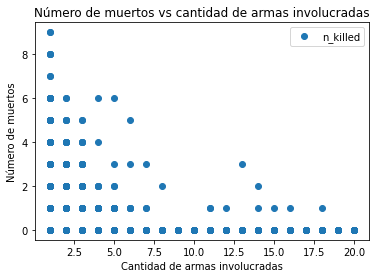

In [ ]:
guns = gun_violence_2
guns = guns.drop(guns[guns.n_guns_involved > 20].index)
guns = guns.drop(guns[guns.n_killed >= 10].index)

#Ploteamos el dataset
guns.plot(y='n_killed', x='n_guns_involved', style="o")
plt.title('Número de muertos vs cantidad de armas involucradas')
plt.ylabel('Número de muertos')
plt.xlabel('Cantidad de armas involucradas')
plt.show()

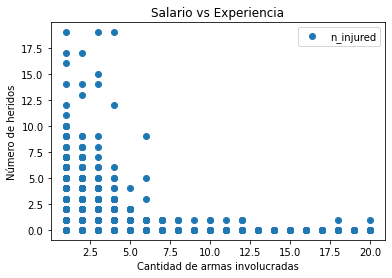

In [ ]:
guns = gun_violence_2
guns = guns.drop(guns[guns.n_guns_involved > 20].index)
guns = guns.drop(guns[guns.n_injured >= 20].index)

#Ploteamos el dataset
guns.plot(y='n_injured', x='n_guns_involved', style="o")
plt.title('Salario vs Experiencia')
plt.ylabel('Número de heridos')
plt.xlabel('Cantidad de armas involucradas')
plt.show()

# ***Interpretación de datos obtenidos***

A partir de las relaciones entre variables graficadas, obtenemos los siguientes resultados.

***Hipótesis Nº1:*** Se cumple lo contrario a nuestra hipótesis, la cantidad de muertos es mayor en aquellos eventos en los que se ven involucradas una menor cantidad de armas.

***Hipótesis Nº2:*** Se cumple lo contrario a nuestra hipótesis, la cantidad de heridos es mayor en aquellos eventos en los que se ven involucradas una menor cantidad de armas.


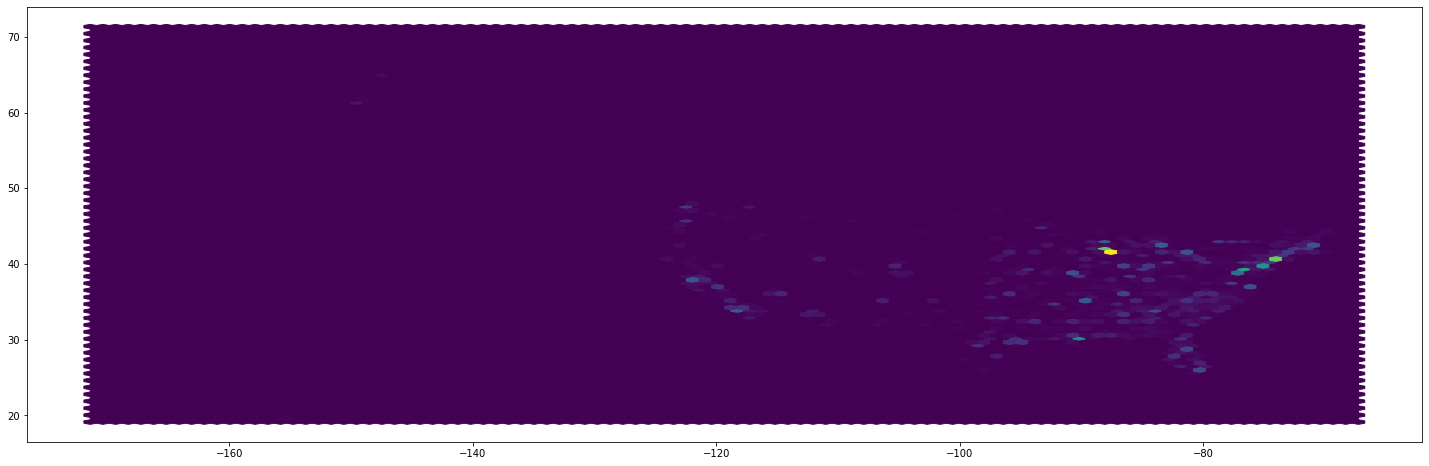

In [ ]:
lon = gun_violence_map['longitude']
lat = gun_violence_map['latitude']
fig, ax = plt.subplots(figsize=(25, 8))
plt.hexbin(lon,lat)

In [ ]:
fig = px.scatter_geo(gun_violence_map,lat,lon, hover_name="state_senate_district", opacity=0.01)
fig.update_layout(title = 'Gun Violence Incidents', title_x=0.5, geo_scope='usa')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# ***Análisis de resultados e insights***

A partir de las visualizaciones generadas y lo que se desprende de las mismas, entendemos que una de las preguntas que nos hacíamos al principio ya puede ser respondida:

*   ¿Hay alguna zona del territorio del país, o de algún estado en particular, que muestre mayor cantidad de incidentes?

Encontramos una alta cantidad de incidentes sobre las costas del país mientras que se vuelven mas espaciados y menos frecuentes en la zona central del mismo. A partir de esto entendemos que sería viable trabajar con los estados como unidades independientes para crear un modelo que permita predecir alguna de las variables de interés.

Para la pregunta:

* ¿Existe una relación entre la cantidad de personas involucradas en un hecho, su sexo y su grupo etáreo con el resultado del mismo (participantes muertos o heridos)?

Con el fin de contestar esta pregunta hemos desarrollado el siguiente notebook: https://colab.research.google.com/drive/1TdLlKsW2YyjjwLs2IjYNL-u37y5TltBg?usp=sharing

Dentro del mismo se encuentra desarrollado el proceso de feature selection y prueba de variables y sus relaciones, así como el entrenamiento y validación de un modelo de regresión para predecir resultados de los incidentes.

